<a href="https://colab.research.google.com/github/Kumarisimran626/S.K-Retail_sales_prediction/blob/main/S_K_Retail_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

#<b/>Project Type - Regression</b>


#<b/>Contribution - Individual
###Name - Simran Kumari</b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

#<b/>Project Summary -</b>


## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

##Business Problem
The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely.
 Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time.
 This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same.

 Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.

####Approach
* Business Problem
* Data Collection and Preprocessing
      - Importing important libraries and modules
      - Data Cleaning
      - Missing Data Handling
      - Merging the Datasets
* Exploratory Data Analysis
      - Hypothesis
      - Categorical Features
      - Continuous Features
      - EDA Conclusion and Validating Hypotheses
* Feature Selection and Outlier Detection
      - Feature Engineering
      - Outlier Detection and Treatment
* Modeling
      - Train Test Split
      - Baseline Model - Decision Tree
      - Random Forest Model
      - Random Forest Hyperparameter Tuning
      - Random Forest Feature Importance
* Model Performance and Evaluation
        - Visualizing Model Performances
        - Random Forest vs Baseline Model
        - Random Forest Tuned vs Baseline and Random Forest Models
* Store wise Sales Predictions
* Conclusion and Recommendations


#<b/>Let's Begin!</b>

#<b/>Importing essential libraries</b>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
from scipy import stats
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime


# importing missingo library which helps us to visualize the missing values
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd

# Define the directory path  files are located
file_directory = '/content/drive/MyDrive/Retail sales prediction/'

# Read the Rossmann Stores Data
rossmann_df = pd.read_csv(file_directory + 'Rossmann Stores Data.csv')

# Read the store data
store_df = pd.read_csv(file_directory + 'store.csv')

<ipython-input-15-9928fa37a5a0>:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann_df = pd.read_csv(file_directory + 'Rossmann Stores Data.csv')


# <b>Exploring and Understanding more about data</b>


In [17]:
#total number of row and columns
rossmann_df.shape

(1017209, 9)

In [18]:
#we have historical sales data and stores datasets
#first look of the sales data
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [22]:
rossmann_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [20]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There are  1017209 rows or observations and 9 columns in this dataset. There seems to be no null values in it. It has integer, datetime and object as data types.

In [19]:
#shape of the stores data
store_df.shape

(1115, 10)

In [23]:
#info about the stores
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are 1115 rows and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good results later on.

In [25]:
# Dataset Duplicate Value Count
print(f"Number of duplicated rows in Rossmann dataset: {rossmann_df.duplicated().sum()}")
print(f"Number of duplicated rows in Store dataset: {store_df.duplicated().sum()}")

Number of duplicated rows in Rossmann dataset: 0
Number of duplicated rows in Store dataset: 0


We do not have any duplicated rows in both the dataset and that is very good for us.

####Missing Data Handling

In [44]:
#null values in stores df
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

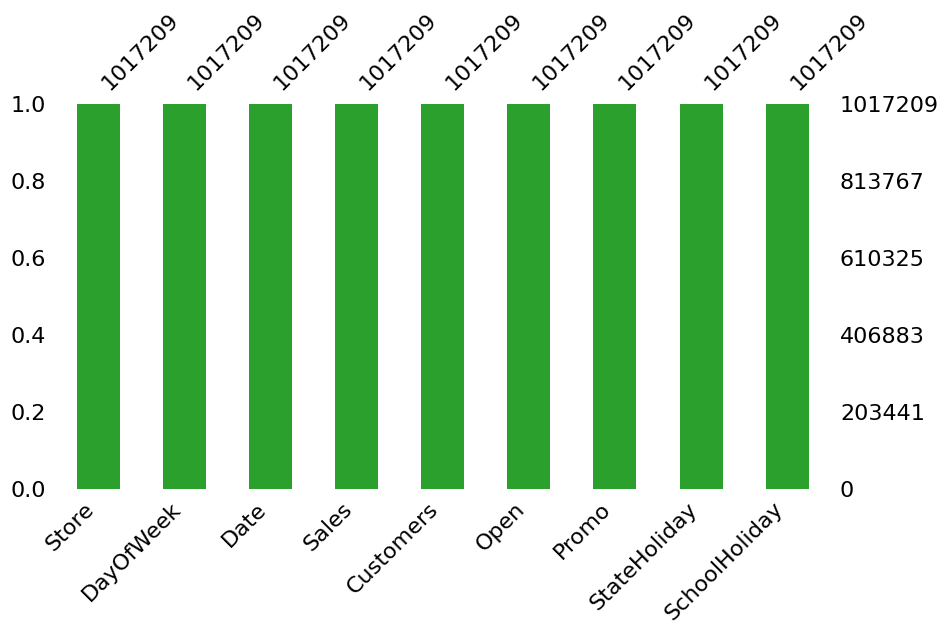

In [45]:
# Visualizing the missing values in Rossmann dataset
msno.bar(rossmann_df,figsize=(10,5), color="tab:green")

Text(0.5, 0, 'Competition Distance Distribution Plot')

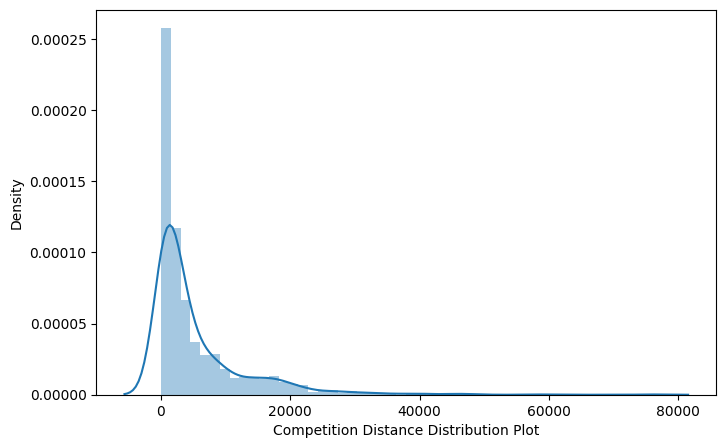

In [46]:
#distribution plot of competition distance
sns.distplot(x=store_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.

In order to fill the null values of CompetitionDistance we have 4 options:
1. Zero(0) >> Not effective as the corresponding values for CompetitionSinceMonth and CompetitionSinceYear are not zero.
2. Mean >> Replacing null values with mean will create blunders as it contains outliers and mean is influenced with outliers.
3. Median >> To get good results replacing with median can be a better choice.
4. Mode >> Mode can also help to fill the null values in our case.

Since, we have two options(Mode and Median) we are going with the median.

### 1. CompetitionDistance

In [51]:
## code for replacing Nan values in CompetitionDistance with mode.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

### 2. 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'

There are not much information provided to these data. Also we observe from dataset that where the **Promo2** has value equals to zero there are Nan values for these columns. That means the store which do not wat promotion they have null values in promointerval , promo2sinceweek and so on.So for this purpose the best way to fill those features is to assign value equals to zero.

In [49]:
## code for replacing Nan values with 0.

store_new = store_df.copy()

## Replacing Nan values with 0 in CompetitionOpenSinceMonth
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(0)

## Replacing Nan values with 0 in CompetitionOpenSinceYear
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceWeek
store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceYear
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(0)

## Replacing Nan values with 0 in PromoInterval
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(0)

## Now checking Nan values
store_new.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### What did you know about your dataset?

Till now we get to know the following points about our dataset:
1. **'Rossmann dataset'** is having **1017209 rows and 9 columns** and does not have any null value.
2. **'Stores dataset'** is having **1115 rows and 10 columns**. It contains null values in total six features viz. CompetitionDistance,CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek,Promo2SinceYear and PromoInterval.
3. There are **no duplicate** values present in both the datasets.
4. There are total 4 **categorical features** in 'Rossmann' dataset namely Open, Promo, StateHoliday and SchoolHoliday and 'Stores' contain categorical features namely StoreType, Assortment, Promo2, PromoInterval.




# **## Merging datasets**: We don't want to compromise with quality and quantity of our dataset in order to get the best accuracy in ML model implementation. So, we were wondering to use the best join for the good results and we got to know with our R&D that every join is giving the same shape of our merged dataset with 0 null values. So, we have decided to go with the inner join.

In [52]:
#using inner join for our further analysis
df= pd.merge(rossmann_df, store_df, on="Store", how= "inner")
print(df.shape)

(1017209, 18)


In [53]:
#checking info of our final merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO